In [1]:
from google.colab import files

# Upload both Excel files manually
uploaded = files.upload()


Saving Quebec Production Report_Chennai.xlsx to Quebec Production Report_Chennai.xlsx


In [2]:
from google.colab import files

# Upload both Excel files manually
uploaded = files.upload()


Saving TDM Hourly Production Report.xlsx to TDM Hourly Production Report.xlsx


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [4]:
# Change file names if your uploads differ
file1 = "Quebec Production Report_Chennai.xlsx"
file2 = "TDM Hourly Production Report.xlsx"

df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

print("df1 shape:", df1.shape, " df2 shape:", df2.shape)


df1 shape: (515, 18)  df2 shape: (633, 27)


In [13]:
def preprocess(df):
    df_num = df.select_dtypes(include=[np.number]).copy()
    df_num = df_num.fillna(df_num.mean())
    return df_num

df1_clean = preprocess(df1)
df2_clean = preprocess(df2)

# Merge both datasets (row-wise)
data = pd.concat([df1_clean, df2_clean], axis=0, ignore_index=True)

# Impute missing values after concatenation
data = data.fillna(data.mean())

# Drop columns with all NaN values after imputation (which were all NaN before imputation)
data = data.dropna(axis=1, how='all')

# Check for missing values after dropping columns
print("\nMissing values after dropping columns:\n", data.isnull().sum().sum())

# Check for infinite values
print("Infinite values after dropping columns:\n", np.isinf(data).sum().sum())

# Convert column names to strings
data.columns = data.columns.astype(str)

# Scale features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Split
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)


Missing values after dropping columns:
 0
Infinite values after dropping columns:
 0


In [14]:
input_dim = X_train.shape[1]
encoding_dim = max(1, input_dim // 2)

input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation="relu")(input_layer)
bottleneck = layers.Dense(max(1, encoding_dim // 2), activation="relu")(encoded)
decoded = layers.Dense(encoding_dim, activation="relu")(bottleneck)
output_layer = layers.Dense(input_dim, activation="linear")(decoded)

autoencoder = keras.Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer="adam", loss="mse")

autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 799 (3.12 KB)

 Trainable params: 799 (3.12 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = autoencoder.fit(
    X_train, X_train,
    epochs=30,
    batch_size=32,
    shuffle=True,
    validation_data=(X_test, X_test)
)


Epoch 1/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.9322 - val_loss: 1.2347
Epoch 2/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9573 - val_loss: 1.2069
Epoch 3/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7774 - val_loss: 1.1888
Epoch 4/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8213 - val_loss: 1.1736
Epoch 5/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9451 - val_loss: 1.1511
Epoch 6/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6600 - val_loss: 1.1211
Epoch 7/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9314 - val_loss: 1.0832
Epoch 8/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6971 - val_loss: 1.0148
Epoch 9/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6860 - val_loss: 0.9487
Epoch 10/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6736 - val_loss: 0.8263
Epoch 11/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4093 - val_loss: 0.7413
Epoch 12/30
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4243 - val_lo

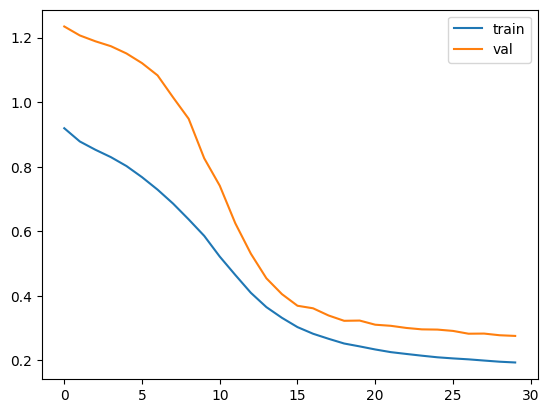

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Mean reconstruction error: 0.2756945076430978
Threshold: 0.8454557173747697
Anomalies detected: 12


In [16]:
# Plot training loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

# Reconstruction error
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)
print("Mean reconstruction error:", np.mean(mse))

# Detect anomalies (top 5% errors)
threshold = np.percentile(mse, 95)
print("Threshold:", threshold)
print("Anomalies detected:", np.sum(mse > threshold))
